In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import re
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('/home/maxim/DS/Phase_0/Phase_0_final_proj/Phase0-Project/data/_data.csv')

# Предварительный отсмотр

In [24]:
data.head(10)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
5,5,274837728,3,Квартира,м. Смоленская (5 мин пешком),"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",...,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Smolensky De Luxe,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274837728
6,6,273643908,"5, Оба варианта",Квартира,м. Арбатская (4 мин пешком),"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,"350000.0 руб./ За месяц, Залог - 350000 руб., ...",...,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/273643908
7,7,274475342,3,Квартира,м. Смоленская (3 мин пешком),"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,"250000.0 руб./ За месяц, Залог - 250000 руб., ...",...,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),Нет,https://www.cian.ru/rent/flat/274475342
8,8,273973191,3,Квартира,м. Смоленская (9 мин пешком),"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",открытая,"130000.0 руб./ За месяц, Залог - 130000 руб., ...",...,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",NaN,NaN,3.0,Пасс (1),Нет,https://www.cian.ru/rent/flat/273973191
9,9,272900409,4,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,"210000.0 руб./ За месяц, Залог - 210000 руб., ...",...,На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,310.0,Пасс (1),Да,https://www.cian.ru/rent/flat/272900409


In [25]:
data.tail(10)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
23358,23358,274997305,1,Квартира,м. Солнцево (4 мин пешком),"Москва, Производственная улица, 8к2, ш. Боровс...",40.0,6/22,NaN,"65000.0 руб./ За месяц, Залог - 65000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...",Лучи,NaN,NaN,NaN,Нет,https://www.cian.ru/rent/flat/274997305
23359,23359,272839104,"3, Изолированная",Квартира,м. Говорово (11 мин пешком),"Москва, Домостроительная улица, 14, ш. Боровск...",85.0/45.0/18.0,1/16,наземная,"80000.0 руб./ За месяц, Залог - 80000 руб., Ко...",...,NaN,NaN,Можно с детьми,"Мебель на кухне, Стиральная машина, Холодильник",Мещерский лес,NaN,NaN,NaN,Нет,https://www.cian.ru/rent/flat/272839104
23360,23360,274905391,1,Квартира,м. Солнцево (5 мин на машине),"Москва, Солнцевский проспект, 19, ш. Боровское...",39.0/20.0/8.0,"12/17, Панельный",NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,На улицу,Совмещенный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.64,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/274905391
23361,23361,202336163,1,Квартира,м. Солнцево (10 мин пешком),"Москва, Солнцевский проспект, 32, ш. Боровское...",32.0/19.0/6.0,"9/9, Панельный",NaN,"35000.0 руб./ За месяц, Залог - 35000 руб., Ко...",...,На улицу,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,NaN,2.64,Пасс (1),Да,https://www.cian.ru/rent/flat/202336163
23362,23362,274652877,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2Ак2, ш. Боровское (3...",25.0/17.0/4.0,"11/17, Монолитный",NaN,"39000.0 руб./ За месяц, Залог - 40000 руб., Ко...",...,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Душевая ка...","Мещерский лес, 2017",NaN,NaN,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/274652877
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525
23367,23367,274672243,"2, Оба варианта",Квартира,м. Говорово (10 мин пешком),"Москва, улица Богданова, 2к1, ш. Боровское (3 ...",90.0/48.2/15.5,"6/23, Панельный",NaN,"57000.0 руб./ За месяц, Залог - 60000 руб., Ко...",...,Во двор,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,NaN,Пасс (3),Да,https://www.cian.ru/rent/flat/274672243


# Общая оценка датафрейма

In [26]:
data.describe()

,Unnamed: 0,ID объявления,"Высота потолков, м"
count,23368.000000,2.336800e+04,11206.00000
mean,11683.500000,2.676265e+08,2.98345
std,6745.904881,1.876862e+07,7.61472
min,0.000000,1.072986e+08,1.20000
25%,5841.750000,2.712663e+08,2.64000
50%,11683.500000,2.739030e+08,2.64000
75%,17525.250000,2.746872e+08,2.80000
max,23367.000000,2.750064e+08,320.00000


# Очистка данных для визуализации

In [27]:
data.drop(columns=['Unnamed: 0', 'Ссылка на объявление', 'Телефоны', 'Описание'], inplace=True)

# Добавление столбца

In [28]:
data['Залог'] = data['Цена']

# Добавление вспомогательных функций

In [29]:
def splitter(text):
    a = text.split(',')
    
    return a[0]

In [30]:
def intchanger(text):
    res = float(''.join(list(filter(lambda x: x.isdigit() == True, text))[:-1]))
    return (res)

In [31]:
def splitter2(text):
    a = text.split(',')
    return a[1]

In [32]:
def intchanger2(text):
    try:
        res = int(''.join(list(filter(lambda x: x.isdigit() == True, text))))
        return (res)
    except:
        return None

# Преобразование данных в столбцах

In [33]:
data['Цена'] = data['Цена'].apply(splitter)
data['Цена'] = data['Цена'].apply(intchanger)

In [34]:
data['Залог'] = data['Залог'].apply(splitter2)
data['Залог'] = data['Залог'].apply(intchanger2)


# Оценка количества пропусков в датафрейме

In [35]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

ID  объявления                  0
Количество комнат            1041
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    13417
Цена                            0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
Залог                         910
dtype: int64


# Скаттерплот количество комнат - цена

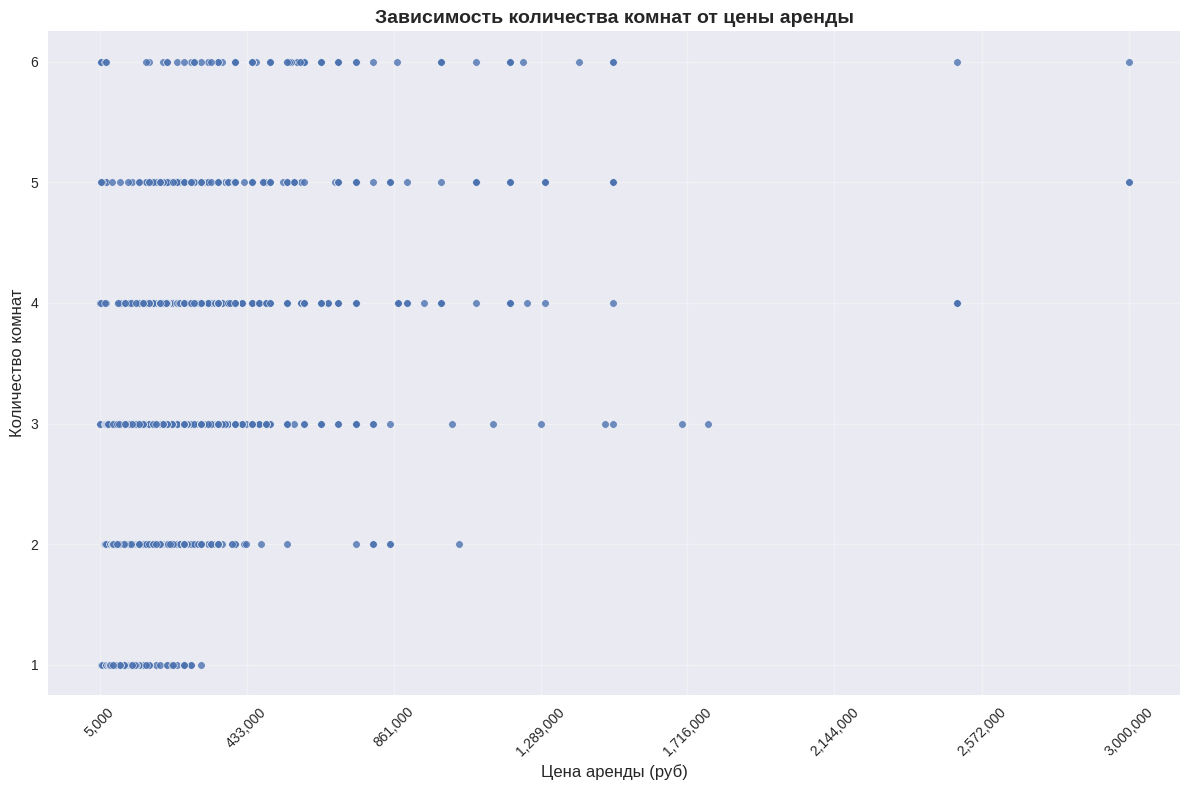

Минимальная цена: 5,000 руб
Максимальная цена: 3,000,000 руб
Средняя цена: 82,894 руб


In [36]:
# Настройка стиля
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

# Преобразуем к числовому типу
data_plot = data.copy()
data_plot['Количество комнат'] = pd.to_numeric(data_plot['Количество комнат'], errors='coerce')

# Создание scatterplot
sns.scatterplot(data=data_plot, x='Цена', y='Количество комнат', alpha=0.8, s=30)

# Просто устанавливаем метки, включая мин и макс значения
min_price = data_plot['Цена'].min()
max_price = data_plot['Цена'].max()
mean_price = data_plot['Цена'].mean()

# Берем несколько ключевых точек
key_prices = [min_price, mean_price, max_price]

additional_ticks = np.linspace(min_price, max_price, 8)
x_ticks = sorted(set([round(x, -3) for x in additional_ticks]))  # Округляем и убираем дубликаты

plt.xticks(x_ticks, [f'{x:,.0f}' for x in x_ticks], rotation=45)

plt.title('Зависимость количества комнат от цены аренды', fontsize=14, fontweight='bold')
plt.xlabel('Цена аренды (руб)', fontsize=12)
plt.ylabel('Количество комнат', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Минимальная цена: {min_price:,.0f} руб")
print(f"Максимальная цена: {max_price:,.0f} руб")
print(f"Средняя цена: {mean_price:,.0f} руб")

# Барплот распределение предложений аренды по количеству комнат

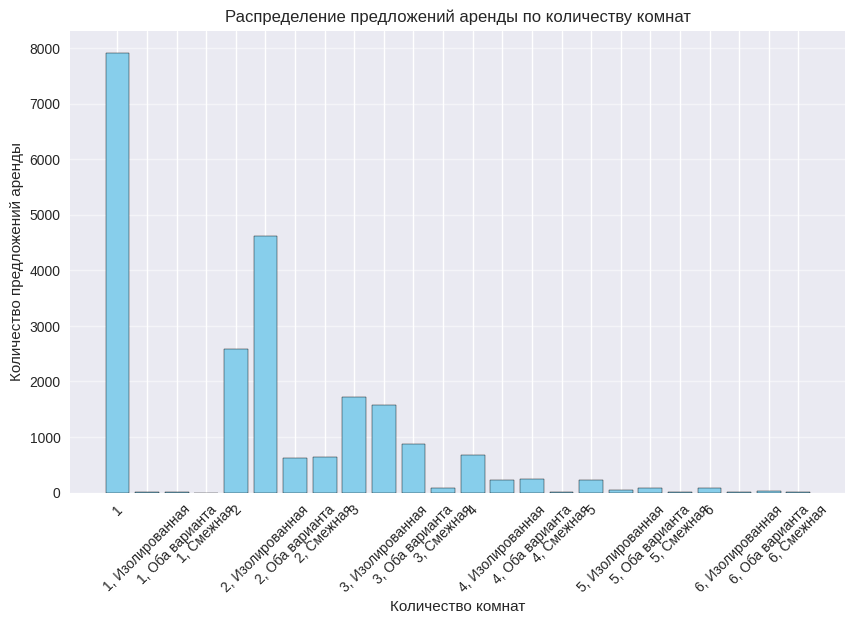

In [37]:
room_counts = data['Количество комнат'].value_counts().sort_index()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(room_counts.index, room_counts.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
# Подписи и оформление
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений аренды')
plt.title('Распределение предложений аренды по количеству комнат')
plt.grid(axis='y', alpha=0.5)

# Показываем график
plt.show()

# Барплот распределений количества объявлений по отделке квартир

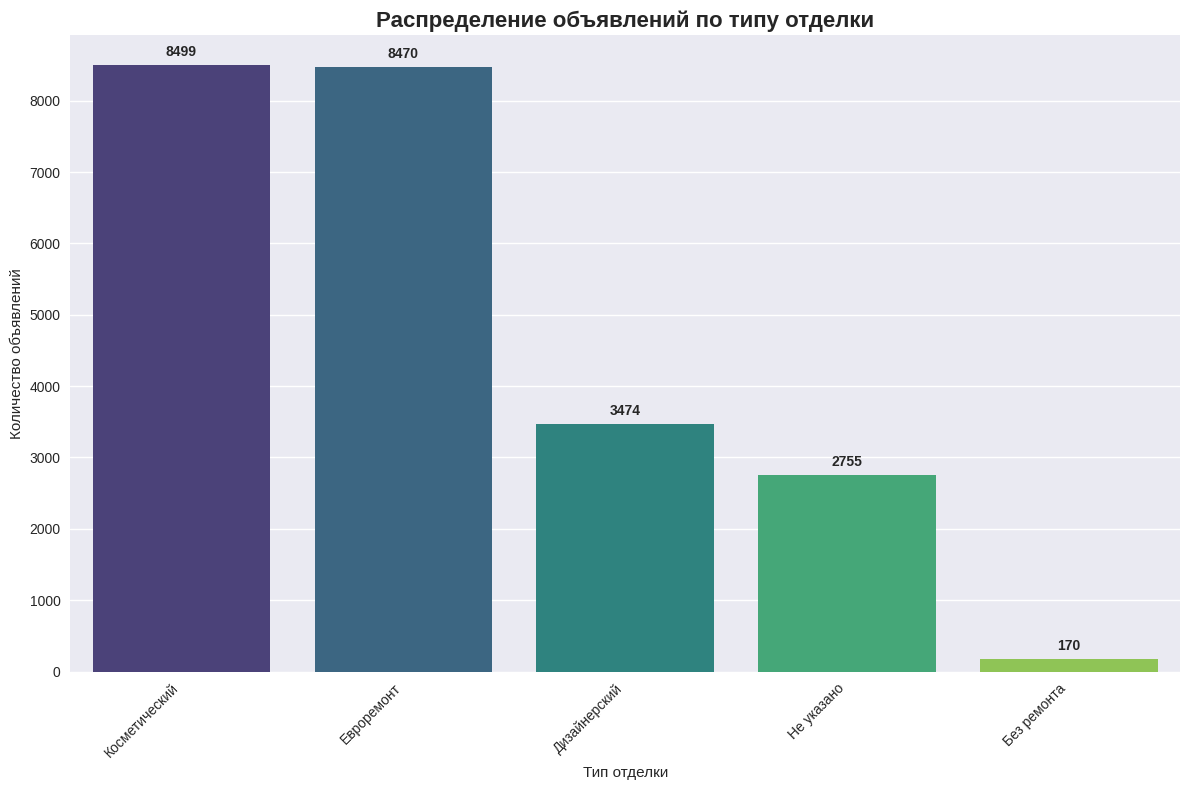

In [38]:
plt.figure(figsize=(12, 8))

# Заполняем пропуски и считаем количество
finish_data = data['Ремонт'].fillna('Не указано')
finish_counts = finish_data.value_counts()

# Строим барплот
ax = sns.barplot(x=finish_counts.index, y=finish_counts.values, palette="viridis")

# Настройки графика
plt.title('Распределение объявлений по типу отделки', fontsize=16, fontweight='bold')
plt.xlabel('Тип отделки')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45, ha='right')

# Добавляем числа на столбцы
for i, v in enumerate(finish_counts.values):
    ax.text(i, v + 0.01 * max(finish_counts.values), 
            str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Барплот распределения условий проживания и количества предложений 

In [39]:
def intchanger(text):
    try:
        res = int(''.join(list(filter(lambda x: x.isdigit() == True, text))))
        return (res)
    except:
        return None

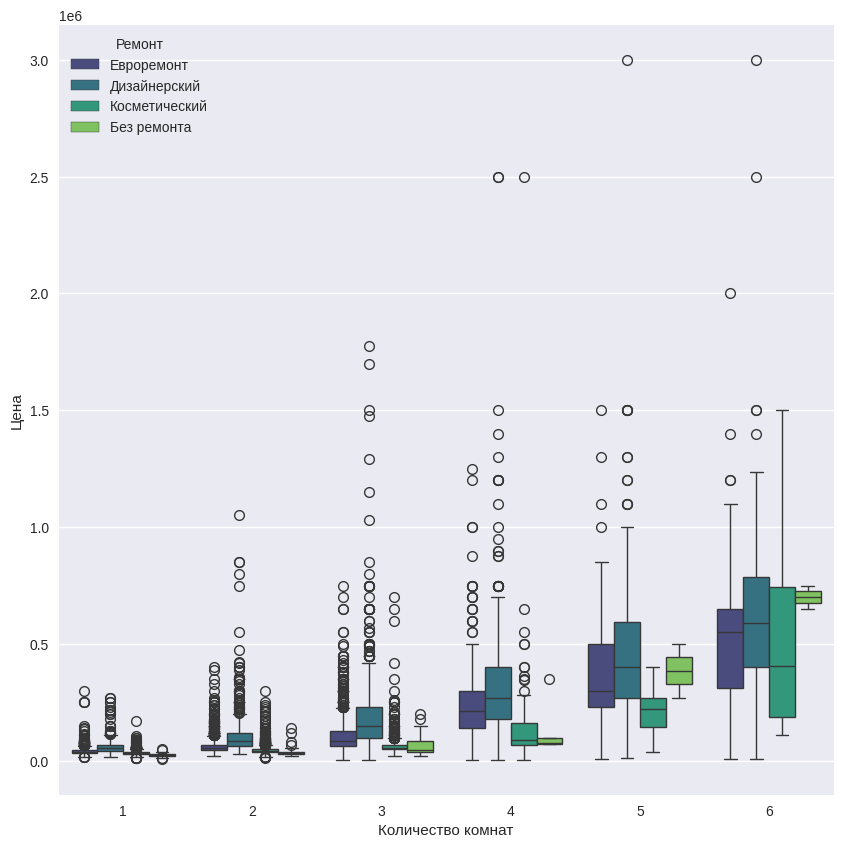

In [40]:
temp = data

temp['Количество комнат'] = temp['Количество комнат'].apply(intchanger)

temp = temp.dropna(subset=['Количество комнат'])
temp['Количество комнат'] = temp['Количество комнат'].astype('int')

fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Количество комнат', y='Цена',
            hue="Ремонт", palette='viridis',
            data=temp)

plt.show()

# Сводная таблица по метро метро и средней стоимости аренды

In [41]:
df_clean = data.dropna(subset=['Метро'])
df_clean = df_clean[df_clean['Метро'].apply(lambda x: not isinstance(x, float))]

def cleaner(text):
    clean_text = re.sub(r'\s*\([^)]*\)', '', text)
    return clean_text

df_clean['Метро'] = df_clean['Метро'].apply(cleaner)

pivot_mean = pd.pivot_table(
    data=df_clean,  # указываем источник данных
    values='Цена',  # список столбцов для агрегации
    index='Метро',  # столбец для группировки по строкам
    # columns=,  # столбец для группировки по столбцам
    aggfunc='mean')  # функция агрегации

pivot_mean

,Цена
Метро,
м. Авиамоторная,66287.822430
м. Автово,25201.736842
м. Автозаводская,66075.421053
м. Адмиралтейская,156500.000000
м. Академическая,62226.033088
...,...
м. Юго-Западная,82717.318841
м. Южная,47273.835616
м. Ясенево,46062.110236


# Барплот распределения условий проживания и количества предложений 

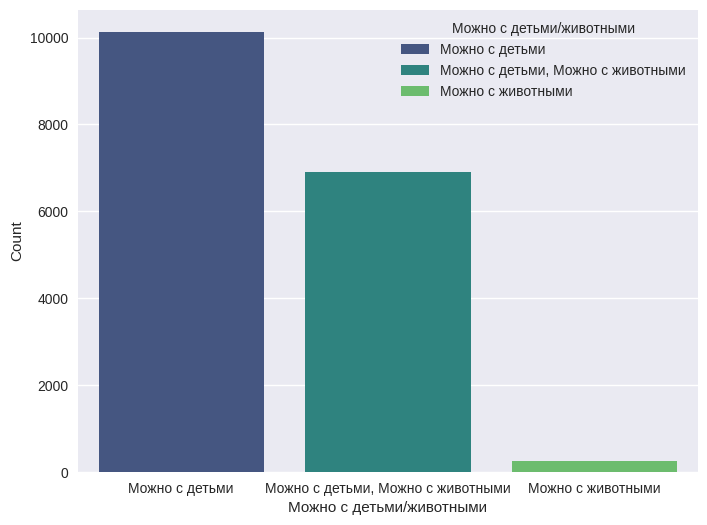

In [42]:
grouped = data.groupby(by='Можно с детьми/животными').agg(Count = ('ID  объявления', 'count'))



plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y='Count', data=grouped, hue=grouped.index, palette='viridis', legend=True)

plt.show()